In [2]:
import numpy as np
import itertools
import scipy.sparse as sparse
import os
import pickle

import matplotlib.pyplot as plt
import importlib
import mtgcardclassification
importlib.reload(mtgcardclassification)
from mtgcardclassification import *


In [5]:
#change this to a local folder on your PC in which "scryfall-all-cards.txt" is stored
direc = 'C:/Users/basvanopheusden/Documents/MTG/'

if os.path.exists(direc + 'scryfall-all-cards-pickled.txt'):
    print('using pre-generated all_cards')
    all_cards = pickle_load(direc,'scryfall-all-cards-pickled.txt')
else: 
    all_cards = load_all_cards(direc)

using pre-generated all_cards


In [6]:
if os.path.exists(direc + 'scryfall-filtered-cards-pickled.txt'):
    print('using pre-generated filtered_cards')
    filtered_cards = pickle_load(direc,'scryfall-filtered-cards-pickled.txt')
else: 
    filtered_cards = get_filtered_cards(direc,all_cards)

using pre-generated filtered_cards


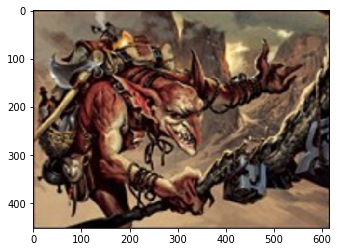

In [7]:
card = np.random.choice(all_cards)
art = get_cropped_art(card)
plt.imshow(art)
plt.show()

In [8]:
unique_card_names,index,num_reprints = np.unique([c['name'] for c in filtered_cards[::-1]],
                                                 return_counts = True,return_index=True)
unique_filtered_cards = [filtered_cards[::-1][i] for i in index]
#reversing the filtered_cards list is necessary to select the first printed edition of each card
print('Number of unique filtered cards:',len(unique_filtered_cards))

Number of unique filtered cards: 17457


In [9]:
most_reprinted_cards = np.array(list(zip(unique_card_names,num_reprints)))[np.argsort(num_reprints)[::-1]][:50]

In [10]:
illegal_cards = list(filter(lambda c: not c['legalities']['vintage'] in ['legal','restricted'], filtered_cards))
print([c['name'] for c in illegal_cards])

['Falling Star', 'Shahrazad', 'Chaos Orb', 'Chaos Orb', 'Chaos Orb']


In [11]:
sets,counts = np.unique([c['set_name'] for c in unique_filtered_cards],return_counts=True)
list(zip(sets[np.argsort(counts)],np.sort(counts)))

[('Eternal Masters', 1),
 ('Eighth Edition', 1),
 ('Time Spiral Timeshifted', 1),
 ('Limited Edition Beta', 2),
 ('Planechase', 4),
 ('Planechase 2012', 17),
 ('Starter 1999', 26),
 ('Commander 2013', 43),
 ('Commander 2011', 46),
 ('Commander 2017', 50),
 ('Conspiracy', 51),
 ('Commander 2018', 53),
 ('Commander 2016', 54),
 ('Commander 2014', 55),
 ('Commander 2015', 55),
 ('Conspiracy: Take the Crown', 65),
 ('Arabian Nights', 73),
 ('Antiquities', 80),
 ('Battlebond', 82),
 ('Magic 2012', 89),
 ('Fallen Empires', 98),
 ('Magic 2013', 99),
 ('Magic 2010', 102),
 ('Magic 2011', 104),
 ('Homelands', 105),
 ('Magic 2014', 106),
 ('Portal Second Age', 112),
 ('The Dark', 112),
 ("Urza's Destiny", 123),
 ("Dragon's Maze", 123),
 ('Exodus', 124),
 ('Stronghold', 126),
 ('Scourge', 127),
 ('Apocalypse', 129),
 ('Dark Ascension', 129),
 ('Magic 2015', 130),
 ('Born of the Gods', 130),
 ('Prophecy', 131),
 ('Worldwake', 132),
 ('Judgment', 133),
 ("Urza's Legacy", 133),
 ('Alliances', 133),


In [131]:
#leagcy, do not use
#def get_color_asymmetry(f):
#    if np.sum(f[1:])>0:
#        return sts.power_divergence(f[1:],(color_counts[1:]/np.sum(color_counts[1:])*np.sum(f[1:])),lambda_ = "log-likelihood")
#    else:
#        return 0,1

In [17]:
mono_colors = [['W'],['U'],['B'],['R'],['G']]
keys = ['name','power','toughness','type','subtype','manacost','oracletext']
m,matching_cards,inds = classify_card_colors_kfold(unique_filtered_cards,keys,10,mono_colors)

[['W'], ['U'], ['B'], ['R'], ['G']]
loading cards
building design matrix
building design matrix for name
building design matrix for power
building design matrix for toughness
building design matrix for type
building design matrix for subtype
building design matrix for manacost
building design matrix for oracletext
starting fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 117 seconds


C:\Users\basvanopheusden\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 135 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 142 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 113 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 121 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 116 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 113 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 120 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  2.0min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 111 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


max_iter reached after 112 seconds


[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.9min finished


In [19]:
with open(direc + 'classification_model_5c_color_identity_pickled.txt','wb') as f:
    pickle.dump((m,matching_cards),f)

In [22]:
with open(direc + 'classification_model_5c_color_identity_pickled.txt','rb') as f:
    (m,matching_cards) = pickle.load(f)

In [23]:
most_predictive_features = get_most_predictive_features(m)
#Note: this does not work for binary classification, only 2+ colors
[(x,y,c) for ((x,y),d,c) in most_predictive_features]

[('subtype', 'Zombie', 'B'),
 ('subtype', 'Merfolk', 'U'),
 ('subtype', 'Elf', 'G'),
 ('oracletext', 'haste', 'R'),
 ('subtype', 'Goblin', 'R'),
 ('subtype', 'Angel', 'W'),
 ('subtype', 'Illusion', 'U'),
 ('subtype', 'Demon', 'B'),
 ('subtype', 'Druid', 'G'),
 ('oracletext', 'reach', 'G'),
 ('subtype', 'Vampire', 'B'),
 ('subtype', 'Cleric', 'W'),
 ('oracletext', 'deathtouch', 'B'),
 ('oracletext', 'fear', 'B'),
 ('subtype', 'Soldier', 'W'),
 ('subtype', 'Skeleton', 'B'),
 ('oracletext', 'vigilance', 'W'),
 ('subtype', 'Kor', 'W'),
 ('subtype', 'Rat', 'B'),
 ('subtype', 'Horror', 'B'),
 ('subtype', 'Wizard', 'U'),
 ('subtype', 'Plant', 'G'),
 ('oracletext', 'green', 'G'),
 ('oracletext', 'forestwalk', 'G'),
 ('oracletext', 'with_flying', 'G'),
 ('subtype', 'Knight', 'W'),
 ('subtype', 'Minotaur', 'R'),
 ('name', 'goblin', 'R'),
 ('oracletext', 'black', 'B'),
 ('oracletext', 'discards', 'B'),
 ('oracletext', 'trample', 'G'),
 ('oracletext', 'flying', 'U'),
 ('subtype', 'Vedalken', 'U'),

In [24]:
accuracy = np.mean(m.is_correct)
print(accuracy)

0.8022684310018904


In [25]:
def plot_predicted_dist(m,i,alpha=1):
    plt.bar(np.arange(0,len(m.unique_colors)),m.predicted_color_dists[i,:],alpha=alpha)
    plt.xticks(np.arange(0,len(m.unique_colors)),labels=m.unique_colors, rotation=90)
    plt.show()

def show_classification_info(m,cards,i,show_plot=True):
    card = cards[i]
    predicted_colors = m.unique_colors[np.argmax(m.predicted_color_dists[i,:])]
    
    features,importance,intercept = m.get_features_by_importance(i,predicted_colors)
    
    print('----------------')
    print("Card:",card['name'])
    print("Colors:",card["colors"])
    print("Mana cost:",card['mana_cost'])
    print("type:",card["type_line"])
    print("Predicted colors",[predicted_colors])
    print("Confidence:",m.confidence[i])
    print("Oracle text:",card['oracle_text'])
    print("Intercept:",intercept)
    print("Strongest features:",[(features[k],importance[k]) for k in np.argsort(importance)[::-1] if importance[k]>0][:10])
    if show_plot:
        plot_predicted_dist(m,i)

----------------
Card: Unwilling Recruit
Colors: ['R']
Mana cost: {X}{R}{R}{R}
type: Sorcery
Predicted colors ['R']
Confidence: 0.9753180817217875
Oracle text: Gain control of target creature until end of turn. Untap that creature. It gets +X/+0 and gains haste until end of turn.
Intercept: 0.013496272163127954
Strongest features: [(('oracletext', 'haste'), 2.3887856348656498), (('oracletext', 'control_of'), 0.5215365734026757), (('oracletext', 'gets'), 0.3660767107664436), (('oracletext', 'gain_control'), 0.309189982872423), (('oracletext', 'gain_control_of'), 0.309189982872423), (('oracletext', 'end'), 0.2843002012343857), (('oracletext', 'gains_haste'), 0.2823328766314252), (('oracletext', '+x/+0'), 0.28074279658402135), (('oracletext', 'gets_+x/+0'), 0.16363951588018102), (('oracletext', 'gains_haste_until_end_of'), 0.1382416545492392)]


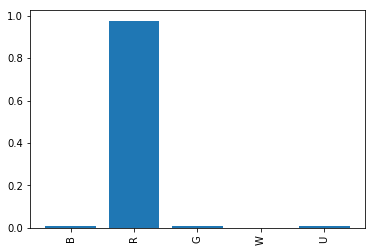

----------------
Card: Blaster Mage
Colors: ['R']
Mana cost: {2}{R}
type: Creature — Human Spellshaper
Predicted colors ['R']
Confidence: 0.5062877959243475
Oracle text: {R}, {T}, Discard a card: Destroy target Wall.
Intercept: 0.013496272163127954
Strongest features: [(('toughness', '2'), 0.5067115404524504), (('oracletext', 'destroy'), 0.4686966636754445), (('name', 'mage'), 0.2826243316677691), (('oracletext', 'wall'), 0.24419705615934575), (('type', 'Creature'), 0.23141623313119689), (('oracletext', 'discard_a_card'), 0.2211113372449157), (('oracletext', 'target_wall'), 0.18938295651418594), (('oracletext', 'discard'), 0.15306650641560948), (('subtype', 'Human'), 0.15275632784738666), (('oracletext', 'target'), 0.12461427036612682)]


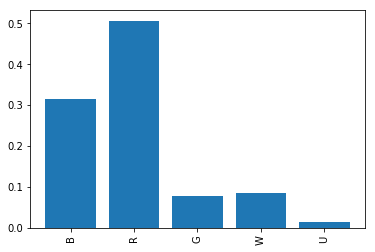

----------------
Card: Zodiac Dragon
Colors: ['R']
Mana cost: {7}{R}{R}
type: Creature — Dragon
Predicted colors ['B']
Confidence: 0.3685185449153741
Oracle text: When Zodiac Dragon is put into your graveyard from the battlefield, you may return it to your hand.
Intercept: -0.04204527924039492
Strongest features: [(('oracletext', 'graveyard'), 0.7869626376663353), (('oracletext', 'hand'), 0.2303947038477985), (('oracletext', 'from_the_battlefield'), 0.2044124333477061), (('oracletext', 'put_into_your'), 0.16624203017735964), (('oracletext', 'may_return'), 0.15023158841963358), (('oracletext', 'put_into_your_graveyard'), 0.14587219661903855), (('oracletext', 'the_battlefield_you_may'), 0.1329833669056257), (('oracletext', 'battlefield_you_may'), 0.1329833669056257), (('oracletext', 'graveyard_from_the_battlefield_you'), 0.12751733777420216), (('oracletext', 'battlefield'), 0.12425075816522552)]


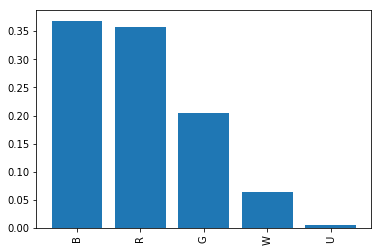

----------------
Card: Magmatic Force
Colors: ['R']
Mana cost: {5}{R}{R}{R}
type: Creature — Elemental
Predicted colors ['R']
Confidence: 0.9137713810543384
Oracle text: At the beginning of each upkeep, Magmatic Force deals 3 damage to any target.
Intercept: 0.013496272163127954
Strongest features: [(('oracletext', 'deals'), 0.8635260649253949), (('oracletext', 'damage'), 0.736856215455389), (('subtype', 'Elemental'), 0.6812376318232253), (('oracletext', 'at'), 0.46282240585621875), (('oracletext', 'any_target'), 0.45346921840523025), (('oracletext', 'to_any'), 0.3591675096075613), (('oracletext', 'damage_to'), 0.3511614165345213), (('oracletext', 'damage_to_any'), 0.28635996463861374), (('oracletext', 'to_any_target'), 0.25592834015297944), (('oracletext', 'deals_3_damage_to'), 0.24394707117282735)]


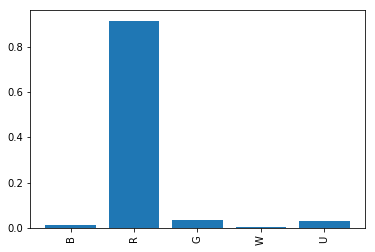

----------------
Card: Shaleskin Plower
Colors: ['R']
Mana cost: {3}{R}
type: Creature — Beast
Predicted colors ['R']
Confidence: 0.6781804196924971
Oracle text: Morph {4}{R} (You may cast this card face down as a 2/2 creature for {3}. Turn it face up any time for its morph cost.)
When Shaleskin Plower is turned face up, destroy target land.
Intercept: 0.0023499528706106315
Strongest features: [(('oracletext', 'destroy_target_land'), 0.6345111222168034), (('toughness', '2'), 0.4882402712836335), (('oracletext', 'destroy'), 0.3963537256758652), (('oracletext', 'land'), 0.3671913260166095), (('oracletext', 'target_land'), 0.3432277046024146), (('type', 'Creature'), 0.277055867049389), (('subtype', 'Beast'), 0.1949424040112526), (('oracletext', 'target'), 0.15239827587888186), (('oracletext', '{4}{@}'), 0.0858105546110792), (('manacost', '{3}'), 0.05589902013251247)]


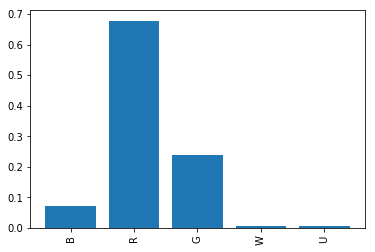

----------------
Card: Squirrel Mob
Colors: ['G']
Mana cost: {1}{G}{G}
type: Creature — Squirrel
Predicted colors ['G']
Confidence: 0.6089912497145882
Oracle text: Squirrel Mob gets +1/+1 for each other Squirrel on the battlefield.
Intercept: 0.015818831461256448
Strongest features: [(('type', 'Creature'), 0.8684586531256173), (('oracletext', '+1/+1'), 0.45059291834446596), (('oracletext', 'on'), 0.22547245494572163), (('oracletext', 'each'), 0.17614313503833956), (('manacost', '{@}'), 0.10232991039254401), (('oracletext', 'other'), 0.06485087104190256), (('oracletext', 'for_each'), 0.035823998218124486), (('oracletext', 'gets_+1/+1'), 0.00584588338514715), (('toughness', '2'), 4.907944184938437e-06)]


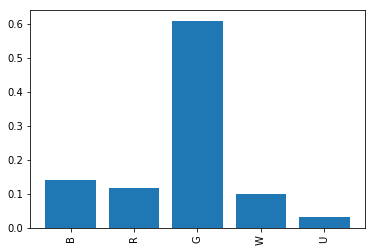

----------------
Card: Silvos, Rogue Elemental
Colors: ['G']
Mana cost: {3}{G}{G}{G}
type: Legendary Creature — Elemental
Predicted colors ['G']
Confidence: 0.9415241453963057
Oracle text: Trample
{G}: Regenerate Silvos, Rogue Elemental.
Intercept: 0.006633707074047592
Strongest features: [(('oracletext', 'trample'), 1.4430215609378287), (('oracletext', 'regenerate'), 1.032240836983516), (('type', 'Creature'), 0.9453875246489266), (('power', '8'), 0.5071724974945961), (('manacost', '{@}'), 0.04740499840822729), (('subtype', 'Elemental'), 7.154120268584452e-07), (('name', 'elemental'), 1.1452954268739057e-07)]


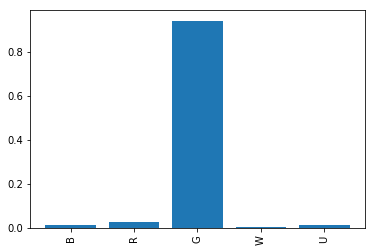

----------------
Card: Shaman of Forgotten Ways
Colors: ['G']
Mana cost: {2}{G}
type: Creature — Human Shaman
Predicted colors ['G']
Confidence: 0.9320381500379333
Oracle text: {T}: Add two mana in any combination of colors. Spend this mana only to cast creature spells.
Formidable — {9}{G}{G}, {T}: Each player's life total becomes the number of creatures they control. Activate this ability only if creatures you control have total power 8 or greater.
Intercept: 0.002968187585956537
Strongest features: [(('type', 'Creature'), 0.8560090153872599), (('oracletext', 'the_number_of_creatures'), 0.4552131420991584), (('subtype', 'Shaman'), 0.44155454586488496), (('oracletext', '8'), 0.33561396345777217), (('oracletext', 'mana'), 0.29474295391890903), (('oracletext', 'power'), 0.27890731431564253), (('oracletext', 'spells'), 0.24537939511455367), (('oracletext', 'cast'), 0.22302430348455618), (('oracletext', 'you_control'), 0.2021192093172209), (('oracletext', 'each'), 0.18075089379211717)]


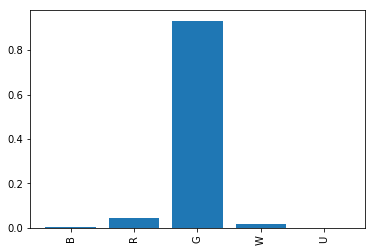

----------------
Card: Dragonmaster Outcast
Colors: ['R']
Mana cost: {R}
type: Creature — Human Shaman
Predicted colors ['R']
Confidence: 0.9271318640307548
Oracle text: At the beginning of your upkeep, if you control six or more lands, create a 5/5 red Dragon creature token with flying.
Intercept: 0.004725218596508261
Strongest features: [(('oracletext', 'red'), 0.9269191974192301), (('subtype', 'Shaman'), 0.8945208970864353), (('oracletext', 'dragon'), 0.8368924414254846), (('oracletext', 'lands'), 0.6364295484471262), (('toughness', '1'), 0.4511202564961373), (('oracletext', 'at'), 0.41646269407849146), (('oracletext', 'token_with_flying'), 0.2686935298080197), (('oracletext', 'creature_token_with_flying'), 0.2686935298080197), (('type', 'Creature'), 0.21347957401490417), (('oracletext', 'with'), 0.2124113860639003)]


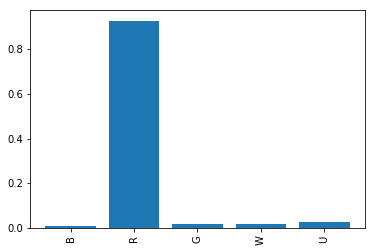

----------------
Card: Carrion Call
Colors: ['G']
Mana cost: {3}{G}
type: Instant
Predicted colors ['G']
Confidence: 0.8484449280372104
Oracle text: Create two 1/1 green Insect creature tokens with infect. (They deal damage to creatures in the form of -1/-1 counters and to players in the form of poison counters.)
Intercept: 0.010105744995267585
Strongest features: [(('oracletext', 'green'), 1.5290818937823463), (('oracletext', '1/1_green'), 0.7220822561462121), (('oracletext', '1/1'), 0.34714259874206954), (('oracletext', 'infect'), 0.313811723486157), (('oracletext', 'create'), 0.2590898177419977), (('oracletext', 'tokens'), 0.09688437937752503), (('oracletext', 'create_two'), 0.07393669326572866), (('oracletext', '1/1_green_insect'), 0.06776982281892188), (('oracletext', '1/1_green_insect_creature'), 0.06776982281892188), (('manacost', '{@}'), 0.05567032945845253)]


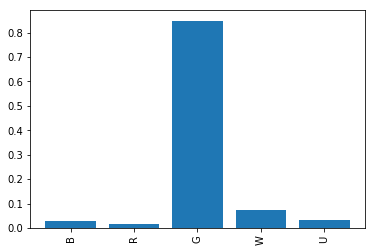

In [26]:
for _ in range(10):
    show_classification_info(m,matching_cards,np.random.randint(len(inds)))

In [39]:
for n in range(5):
    print('----------------')
    print("Most confidently correctly classified cards with " + str(n) + " word" + ("" if n==1 else "s") + " in the oracle text:")
    for color in m.unique_colors:
        if len(color)==1:
            priority = m.confidence*(m.unique_colors[m.predicted_color]==color)*[len(get_words_in_oracle_text(card))==n for card in matching_cards]
            #priority = (m.is_correct==0)*m.confidence*(m.unique_colors[m.predicted_color]==color)
            #and len(get_words_in_oracle_text(card))<10 for card in cards])
            ind = np.argsort(priority)[::-1]
            for i in ind[:1]:
                if priority[i]>0:
                    show_classification_info(m,matching_cards,i,False)

----------------
Most confidently correctly classified cards with 0 words in the oracle text:
----------------
Card: Gutter Skulk
Colors: ['B']
Mana cost: {1}{B}
type: Creature — Zombie Rat
Predicted colors ['B']
Confidence: 0.9736305895150712
Oracle text: 
Intercept: -0.04797420268012811
Strongest features: [(('subtype', 'Zombie'), 2.659653419024686), (('subtype', 'Rat'), 1.6115761090865348), (('toughness', '2'), 0.3638402648984182), (('manacost', '{@}'), 0.08031876533437067), (('manacost', '{1}'), 0.008732082730785056)]
----------------
Card: Goblin Assailant
Colors: ['R']
Mana cost: {1}{R}
type: Creature — Goblin Warrior
Predicted colors ['R']
Confidence: 0.9780497638785132
Oracle text: 
Intercept: -0.005091459499609956
Strongest features: [(('subtype', 'Goblin'), 2.3621479040356004), (('name', 'goblin'), 1.6531796431565087), (('subtype', 'Warrior'), 0.562468491426766), (('toughness', '2'), 0.52536810877381), (('type', 'Creature'), 0.21325863058179184)]
----------------
Card: Cylian

----------------
Card: Vampire Nighthawk
Colors: ['B']
Mana cost: {1}{B}{B}
type: Creature — Vampire Shaman
Predicted colors ['B']
Confidence: 0.9974417571785315
Oracle text: Flying, deathtouch, lifelink
Intercept: -0.04008039535527131
Strongest features: [(('subtype', 'Vampire'), 1.9806559719664907), (('oracletext', 'deathtouch'), 1.8297387843318194), (('oracletext', 'lifelink'), 1.2482611978422868), (('name', 'vampire'), 0.7651085826336907), (('subtype', 'Shaman'), 0.43116677308482526), (('toughness', '3'), 0.15545256168167684), (('manacost', '{@}'), 0.09873552019597738), (('manacost', '{1}'), 0.045179015981153405)]
----------------
Card: Goblin Striker
Colors: ['R']
Mana cost: {1}{R}
type: Creature — Goblin Berserker
Predicted colors ['R']
Confidence: 0.9997554885558958
Oracle text: First strike, haste
Intercept: -0.005091459499609956
Strongest features: [(('oracletext', 'haste'), 2.4589986340364156), (('subtype', 'Goblin'), 2.3621479040356004), (('name', 'goblin'), 1.65317964315650

In [199]:
num_colors = np.array([len(set(c1)) for c1 in m.card_colors])
colors_added = np.array([len(set(c1).difference(set(c2))) 
                         for c1,c2 in zip(m.unique_colors[m.predicted_color],m.card_colors)])
colors_omitted = np.array([len(set(c2).difference(set(c1))) 
                           for c1,c2 in zip(m.unique_colors[m.predicted_color],m.card_colors)])

In [200]:
sparse.csr_matrix((np.ones_like(colors_added),(num_colors,colors_added+colors_omitted))).toarray()

array([[    0,     0,     0],
       [10620,     0,  2605]], dtype=int32)

----------------
Card: Grizzly Bears
Colors: ['G']
Mana cost: {1}{G}
type: Creature — Bear
Predicted colors ['G']
Confidence: 0.6548179000997758
Oracle text: 
Intercept: 0.009059745183909751
Strongest features: [(('subtype', 'Bear'), 0.9605564755124223), (('type', 'Creature'), 0.8921784623846685), (('manacost', '{@}'), 0.08159140150669958), (('name', 'bears'), 0.08051118896771309)]


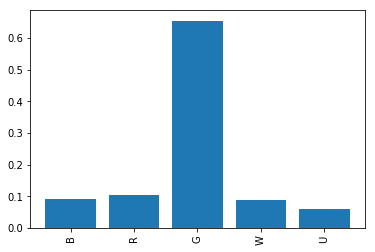

In [201]:
show_classification_info(m,matching_cards,get_card_index_by_name(matching_cards,'grizzly bears'))

In [202]:
def plot_accuracy_by_key(f,keys=None,is_numeric=True,sort_by_count=True,xlabel='',return_values=False):
    x = np.array([f(c) for c in matching_cards])
    if keys==None:
        keys,counts = np.unique(x,return_counts=True)
        if sort_by_count:
            keys = keys[np.argsort(counts)][::-1]
    x_by_key = {key: m.is_correct[np.logical_and(x==key,m.confidence>0)] for key in keys}
    y = [np.mean(x) for key,x in x_by_key.items()]
    yerr = [np.std(x)/np.sqrt(len(x)) for key,x in x_by_key.items()]
    plt.errorbar(x=keys,y=y,yerr=yerr)
    plt.xlabel(xlabel)
    plt.ylabel('Accuracy')
    if not is_numeric:
        plt.xticks(np.arange(0,len(keys)),label=keys,rotation=90)
    plt.show()
    if return_values:
        return keys,y,yerr,x_by_key

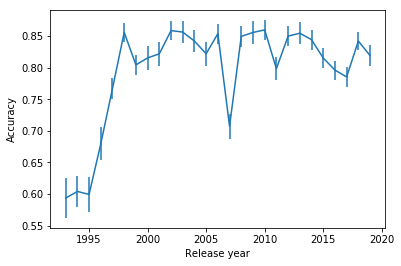

In [203]:
#plot_accuracy_by_key(lambda c:c['rarity'],keys=['common','uncommon','rare','mythic'],is_numeric=False)
#plot_accuracy_by_key(lambda c:len(get_words_in_oracle_text(c)),sort_by_count=False,xlabel='Number of words in oracle text')
#plot_accuracy_by_key(lambda c:c['type_line'].split(' — ')[0],is_numeric=False)
plot_accuracy_by_key(lambda c:int(c['released_at'].split('-')[0]),sort_by_count=False,xlabel='Release year')

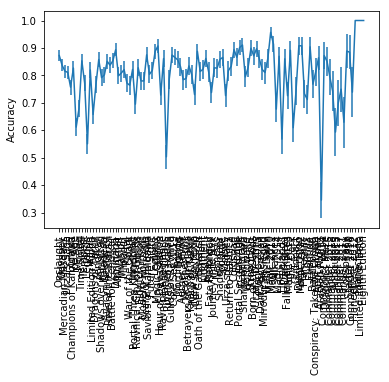

[('Arabian Nights', 52, 0.34615384615384615),
 ('Planar Chaos', 137, 0.5036496350364964),
 ('Legends', 196, 0.5510204081632653),
 ('Homelands', 88, 0.5681818181818182),
 ('Antiquities', 32, 0.59375),
 ('The Dark', 82, 0.6097560975609756),
 ('Ice Age', 219, 0.6118721461187214),
 ('Commander 2011', 27, 0.6296296296296297),
 ('Limited Edition Alpha', 193, 0.6580310880829016),
 ('Alliances', 93, 0.6774193548387096),
 ('Mirage', 219, 0.680365296803653),
 ('Portal Three Kingdoms', 151, 0.695364238410596),
 ('Commander 2013', 30, 0.7),
 ('Conflux', 73, 0.7123287671232876),
 ('Fallen Empires', 84, 0.7261904761904762),
 ('Visions', 117, 0.7264957264957265),
 ('Hour of Devastation', 140, 0.7285714285714285),
 ('New Phyrexia', 126, 0.7301587301587301),
 ('Planeshift', 75, 0.7333333333333333),
 ('Fate Reforged', 122, 0.7377049180327869),
 ('Commander 2016', 23, 0.7391304347826086),
 ('Commander 2018', 35, 0.7428571428571429),
 ('Guildpact', 78, 0.7435897435897436),
 ('Commander 2017', 28, 0.75),
 

In [208]:
keys,y,yerr,x_by_key = plot_accuracy_by_key(lambda c:c['set_name'],is_numeric=False,return_values=True,sort_by_count=True)
# This prints all the sets, plus the number of cards from that set and the model's 
# accuracy on predicting those cards' colors
list(zip(keys[np.argsort(y)],[x_by_key[key].shape[0] for key in keys[np.argsort(y)]],np.sort(y)))

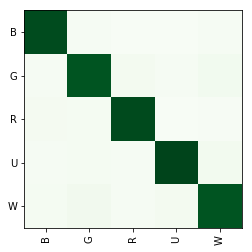

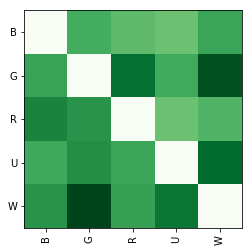

In [212]:
colors, confusion = get_confusion_matrix(m)
plt.imshow(confusion,cmap='Greens')
plt.xticks(np.arange(0,len(colors)),labels=colors,rotation=90)
plt.yticks(np.arange(0,len(colors)),labels=colors)
plt.show()

plt.imshow(np.triu(confusion,1)+np.tril(confusion,-1),cmap='Greens')
plt.xticks(np.arange(0,len(colors)),labels=colors,rotation=90)
plt.yticks(np.arange(0,len(colors)),labels=colors)
plt.show()

In [213]:
(confusion + confusion.T)/2

array([[0.8061756 , 0.04443771, 0.04638851, 0.0399587 , 0.04752339],
       [0.04443771, 0.78593041, 0.05464851, 0.04760087, 0.06821772],
       [0.04638851, 0.05464851, 0.81067961, 0.04060078, 0.04347063],
       [0.0399587 , 0.04760087, 0.04060078, 0.82649109, 0.05942709],
       [0.04752339, 0.06821772, 0.04347063, 0.05942709, 0.78617547]])

In [ ]:
#p = m.predicted_color_dists

#JS = np.sum(p[None,:,:]*np.log(p[:,None,:]+p[None,:,:]),axis=2)+np.sum(p[:,None,:]*np.log(p[:,None,:]+p[None,:,:]),axis=2)
#plt.imshow(JS)
#plt.show()
#X = 1-np.dot(,m.predicted_color_dists.T)

In [ ]:
#u,s,v = np.linalg.svd(p)

In [ ]:
#import sklearn
#X_embedded = sklearn.decomposition.TruncatedSVD(n_components=2).fit_transform(p)
#N=len(cards)
#X_embedded = TSNE(n_components=2).fit_transform(JS[:N,:N])
#c_dict = {'R' : 'red', 'B' : 'black', 'G' : 'green', 'U' : 'blue', 'W' : 'yellow'}
#for c in colors:
#    ind = np.array(m.card_colors)[:N]==c
#    plt.plot(X_embedded[ind,0],X_embedded[ind,1],'.',color=c_dict[c])